# Important images (Do not run it)

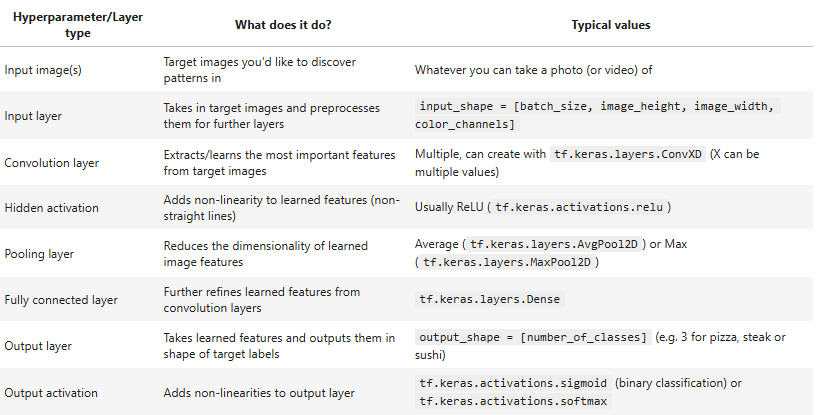

In [ ]:
from IPython.display import Image
Image('/content/Screenshot 2025-03-12 215304.png')

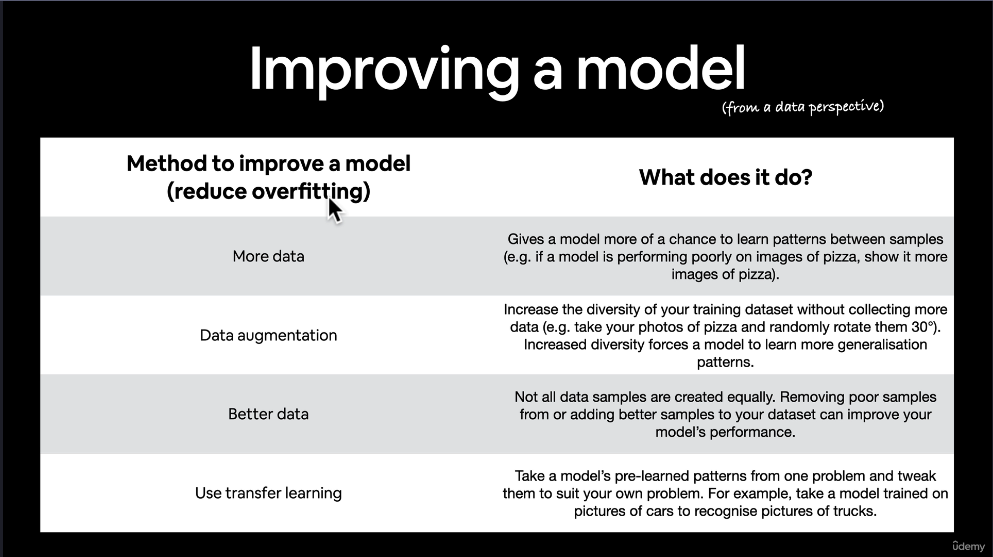

In [ ]:
from IPython.display import Image
Image("/content/Screenshot 2025-04-09 135200.png")

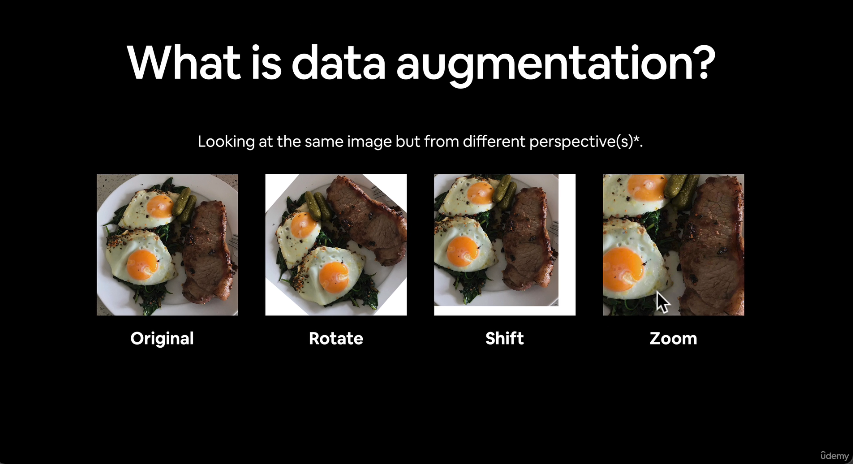

In [ ]:
from IPython.display import Image
Image("/content/Screenshot 2025-04-09 170905.png")

# Introduction to Convolutional Neural Networks and Computer Vision With Tensorflow
Computer vision is the practice of writing algos which can discover patterns in visual data.Such as the camera of a self driving car recognizing the car in front.


## Get the data

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-04-12 00:30:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   125MB/s    in 0.8s    

2025-04-12 00:30:05 (125 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



# Inspect the data
A very crucial step at the beginning of any machine learning project is becoming one with the data.

Amd for a Computer Vision project ... this usually means visualizing many samples of your data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os
import os
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .'")

There are 2 directories and 0 images in 'pizza_steak' .'
There are 2 directories and 0 images in 'pizza_steak/train' .'
There are 0 directories and 750 images in 'pizza_steak/train/pizza' .'
There are 0 directories and 750 images in 'pizza_steak/train/steak' .'
There are 2 directories and 0 images in 'pizza_steak/test' .'
There are 0 directories and 250 images in 'pizza_steak/test/pizza' .'
There are 0 directories and 250 images in 'pizza_steak/test/steak' .'


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Apr 12 00:30 .
drwxr-xr-x 1 root root 4096 Apr 12 00:30 ..
drwxr-xr-x 4 root root 4096 Apr 12 00:30 test
drwxr-xr-x 4 root root 4096 Apr 12 00:30 train


In [ ]:
# Anothe rway to find out how many images are in a file
num_steak_imgages_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_imgages_train

750

# Visualize our images first lets get the class names programmatically

In [ ]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[:]
print(class_names)

['pizza' 'steak']


In [ ]:
#Lets visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir,target_class):
    #Set the target directory (we'll view images from here)
    target_folder = target_dir + target_class

    #Get random image path
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    #Read it the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape : {img.shape}") #Return image shape
    return img

['2884233.jpg']
Image shape : (384, 512, 3)


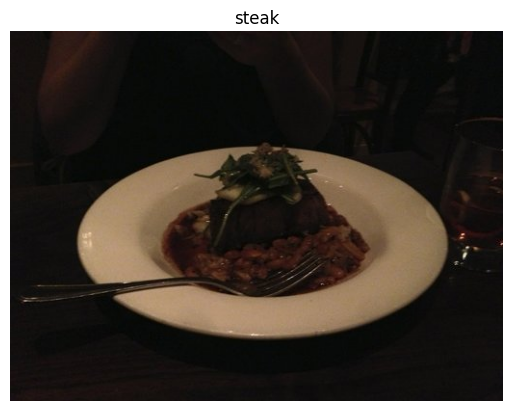

In [ ]:
#View random image from the train dataset
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "steak")

['532970.jpg']
Image shape : (512, 512, 3)


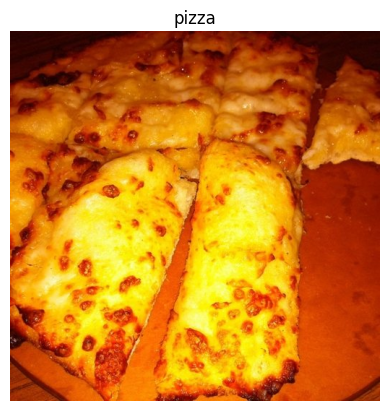

In [ ]:
#View random image from the train dataset
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 42,   2,   2],
        [ 42,   2,   2],
        [ 42,   2,   2],
        ...,
        [ 38,   2,   2],
        [ 40,   4,   4],
        [ 42,   6,   6]],

       [[ 42,   2,   2],
        [ 42,   2,   2],
        [ 42,   2,   2],
        ...,
        [ 38,   2,   2],
        [ 40,   4,   4],
        [ 42,   6,   6]],

       [[ 41,   3,   2],
        [ 41,   3,   2],
        [ 42,   4,   3],
        ...,
        [ 39,   4,   2],
        [ 40,   5,   3],
        [ 41,   6,   4]],

       ...,

       [[159,  45,   8],
        [156,  43,   3],
        [156,  43,   3],
        ...,
        [157,  51,   9],
        [153,  46,   4],
        [152,  45,   3]],

       [[159,  47,   7],
        [155,  44,   1],
        [155,  42,   0],
        ...,
        [158,  51,   7],
        [154,  46,   0],
        [150,  42,   0]],

       [[158,  47,   4],
        [154,  43,   0],
        [155,  42,   0],
        ...,
        [154,  46,   

In [ ]:
#View the image shape
img.shape # returns width,height ,color channels

(512, 512, 3)

**Note** : Many ML models prefer data to be between 0 and 1. Knowing this most common method to do this is **normalization**. Here we get pixel values by dividing arrays by 255.(255 is max pixel value).

In [ ]:
# Get all the pixel values betweem 0 and 1
img/255.

array([[[0.16470588, 0.00784314, 0.00784314],
        [0.16470588, 0.00784314, 0.00784314],
        [0.16470588, 0.00784314, 0.00784314],
        ...,
        [0.14901961, 0.00784314, 0.00784314],
        [0.15686275, 0.01568627, 0.01568627],
        [0.16470588, 0.02352941, 0.02352941]],

       [[0.16470588, 0.00784314, 0.00784314],
        [0.16470588, 0.00784314, 0.00784314],
        [0.16470588, 0.00784314, 0.00784314],
        ...,
        [0.14901961, 0.00784314, 0.00784314],
        [0.15686275, 0.01568627, 0.01568627],
        [0.16470588, 0.02352941, 0.02352941]],

       [[0.16078431, 0.01176471, 0.00784314],
        [0.16078431, 0.01176471, 0.00784314],
        [0.16470588, 0.01568627, 0.01176471],
        ...,
        [0.15294118, 0.01568627, 0.00784314],
        [0.15686275, 0.01960784, 0.01176471],
        [0.16078431, 0.02352941, 0.01568627]],

       ...,

       [[0.62352941, 0.17647059, 0.03137255],
        [0.61176471, 0.16862745, 0.01176471],
        [0.61176471, 0

## END TO END EXAMPLE OF CNN
Let's build a CNN to find patterns in our images, more specifically we need a way:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Set the seed
tf.random.set_seed(42)

#Preprocess data (get all of the pixels between 0 and 1 also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

#Set up paths to our directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42
                                               )
valid_data = valid_datagen.flow_from_directory(test_dir,
                                              batch_size = 32,
                                              target_size = (224,224),
                                              class_mode = "binary",
                                              seed = 42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
#Set the seed
tf.random.set_seed(42)

#Create a  model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = "sigmoid")

])

#Compile our CNN model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

#Fit it

history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps =len(valid_data)
                        )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 202ms/step - accuracy: 0.4957 - loss: 0.6932 - val_accuracy: 0.6140 - val_loss: 0.6895
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 144ms/step - accuracy: 0.6017 - loss: 0.6882 - val_accuracy: 0.6340 - val_loss: 0.6752
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.6209 - loss: 0.6667 - val_accuracy: 0.6320 - val_loss: 0.6112
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.7054 - loss: 0.5733 - val_accuracy: 0.7400 - val_loss: 0.5284
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.7426 - loss: 0.5434 - val_accuracy: 0.7560 - val_loss: 0.5024


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,103 (121.50 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## How to use same model as before

Let's replicate the model we build in previous section to see if its works here or not for our image data ?

In [ ]:
# Set random seed
tf.random.set_seed(42)

#1.Create the model -
model_nn = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid"),
])

#2.Compile it

model_nn.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

#3. fit it

history_nn = model_nn.fit(train_data,
                          epochs = 5,
                          steps_per_epoch = len(train_data),
                          validation_data = valid_data,
                          validation_steps = len(valid_data))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - accuracy: 0.5727 - loss: 0.7975 - val_accuracy: 0.4940 - val_loss: 0.6942
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.5127 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 0.4980 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.5027 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.5126 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932


In [ ]:
model_nn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

In [ ]:
# Set seed
tf.random.set_seed(42)
# create model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])

#Compile it

model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

#Fit it

history_2 = model_2.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data =valid_data,
    validation_steps = len(valid_data)
)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - accuracy: 0.6052 - loss: 4.3707 - val_accuracy: 0.7660 - val_loss: 0.5649
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.7554 - loss: 0.5976 - val_accuracy: 0.7900 - val_loss: 0.4479
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.7221 - loss: 0.8070 - val_accuracy: 0.7800 - val_loss: 0.4866
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.7474 - loss: 0.6035 - val_accuracy: 0.7740 - val_loss: 0.5192
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - accuracy: 0.7657 - loss: 0.5643 - val_accuracy: 0.8000 - val_loss: 0.4169


In [ ]:
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

In [ ]:
  45219605/31103

1453.8663472976884

**NOTE** -

Trainable parameters represent patterns a model learns. While more parameters might seem better, Convolutional Neural Networks (CNNs) focus on learning the most important patterns, unlike dense layers which learn many, potentially less relevant, patterns. Thus, CNNs can be more effective with fewer parameters for image tasks.

## Binary classification : Let's break it down.
1. Become one with the data (vizualise)
2. Preprocess the data (prepared it for our model,the main step here was scaling/normalisation & turning our data into batches)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model ( try to beat the baseline)
7. Repeat until satisfied (experiment)


# 1. Become one with the data

['1724387.jpg']
Image shape : (512, 512, 3)
['2516510.jpg']
Image shape : (512, 287, 3)


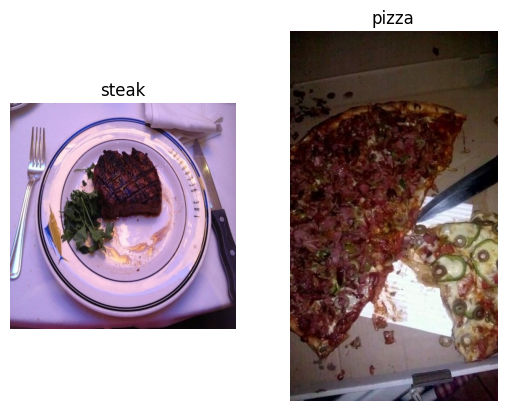

In [ ]:
# Visualise data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image(target_dir = "pizza_steak/train/",
                              target_class = "pizza")

# 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir =  "pizza_steak/train/"
test_dir = "pizza_steak/test/"

## Our next step is to turn our data into **batches**

A batch is a small subest of data. Rather than look at all 1500 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of the processor (GPU)
2. Trying to learn the pattern in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32 ?

Because 32 is good for my health...

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.)
test_datagen = ImageDataGenerator(rescale = 1./255.)

Note -
* The ImageDataGenerator class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model.

* You might've noticed the rescale parameter. This is one example of the transformations we're doing.

* Remember from before how we imported an image and it's pixel values were between 0 and 255?

* The rescale parameter, along with 1/255. is like saying "divide all of the pixel values by 255". This results in all of the image being imported and their pixel values being normalized (converted to be between 0 and 1).

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(train_dir, #Target directory of images
                                               target_size = (224,224), # Target size of images (height,width)
                                               class_mode = 'binary', #Type of data you are working with
                                               batch_size = 32) #Size of mini-batches to load our data into
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             class_mode = "binary",
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of training data batch
# images , labels = train_data.next() # OLD VERSION
images, labels = next(train_data)  # get the "next" batch of images/labels in train_data # NEW VERSION
len(images), len(labels)

(32, 32)

In [ ]:
1500/32

46.875

In [ ]:
# How many batches are there
len(train_data)

47

In [ ]:
# Get the first 2 images -\
images[:2],images[0].shape

(array([[[[0.56078434, 0.63529414, 0.79215693],
          [0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          ...,
          [0.07843138, 0.08235294, 0.05882353],
          [0.08235294, 0.08235294, 0.07450981],
          [0.09803922, 0.09803922, 0.09803922]],
 
         [[0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          ...,
          [0.09803922, 0.10196079, 0.07058824],
          [0.0627451 , 0.06666667, 0.04705883],
          [0.04313726, 0.04313726, 0.03529412]],
 
         [[0.5686275 , 0.6431373 , 0.8078432 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          [0.5647059 , 0.6392157 , 0.8078432 ],
          ...,
          [0.07450981, 0.07843138, 0.04705883],
          [0.15686275, 0.16078432, 0.13725491],
          [0.21568629, 0.21960786, 0.20000002]],
 
         ...,
 
         [[0.3921569 , 0.34901962, 0.22352943],
          [0.39607

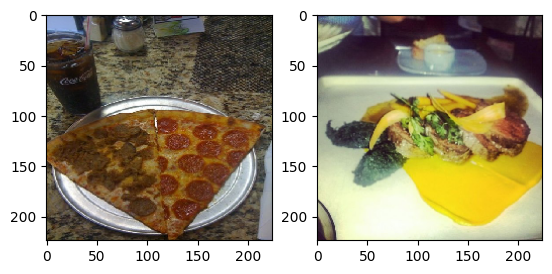

In [ ]:
plt.subplot(1,2,1)
plt.imshow(images[0])
plt.subplot(1,2,2)
plt.imshow(images[1])

In [ ]:
# View the first batch of labels
labels

array([0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.],
      dtype=float32)

# Create a CNN model (start with a baseline)
A baseline is relatively simple model or existing result that you when beginning a ML experiment and then as you keep experimenting , you trying to beat the baseline.

> **NOTE** - In deep learning, there is almost an infinite amount of architecture you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g look at which current model is performing best in the field for your problem)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras.models import Sequential

### Create the model

In [ ]:
#Create the model (this will be our baseline, A 3 layer CNN)
model_3 = Sequential([
    Conv2D(filters = 10, # filter is no of sliding windows going across an input (higher =more complex model)
           kernel_size = (3,3),# size of sliding window going across an input
           strides = (1,1), # the size of the step the sliding window takes and input
           padding="valid", # if same , output shape = input shape, if "valid" then output gets compressed
           activation="relu",
           input_shape =(224,224,3)), #Input layer = (specify input shape)
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

## Theory -

Great! We've got a simple convolutional neural network architecture ready to go.

And it follows the typical CNN structure of:

Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output.

Let's discuss some of the components of the Conv2D layer:

* The "2D" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
* filters - these are the number of "feature extractors" that will be moving over our images.
* kernel_size - the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
* stride - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.
* padding - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

What's a "feature"?

* A feature can be considered any significant part of an image. For example, in our case, a feature might be the circular shape of pizza. Or the rough edges on the outside of a steak.

* It's important to note that these features are not defined by us, instead, the model learns them as it applies different filters across the image.

### Compile model

In [ ]:
# Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ["accuracy"])


In [ ]:
model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

### 4.Fit the model

In [ ]:
# Check length of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
#FIT IT
history_3 = model_3.fit(train_data, # Combination of X & y
                        epochs =5,
                        steps_per_epoch =  len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))



Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 192ms/step - accuracy: 0.6218 - loss: 0.7783 - val_accuracy: 0.6880 - val_loss: 0.5615
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 118ms/step - accuracy: 0.8160 - loss: 0.4493 - val_accuracy: 0.8060 - val_loss: 0.4224
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.9037 - loss: 0.2661 - val_accuracy: 0.7780 - val_loss: 0.5030
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.9828 - loss: 0.0780 - val_accuracy: 0.7040 - val_loss: 0.7991
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.9823 - loss: 0.0603 - val_accuracy: 0.7340 - val_loss: 0.8918


## Evaluate the model.
Check what our model learning

In [ ]:
model_1.evaluate(test_data),model_3.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.7159 - loss: 0.5278
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.7381 - loss: 0.8920


([0.5024291276931763, 0.7559999823570251],
 [0.8918170928955078, 0.734000027179718])

<Axes: >

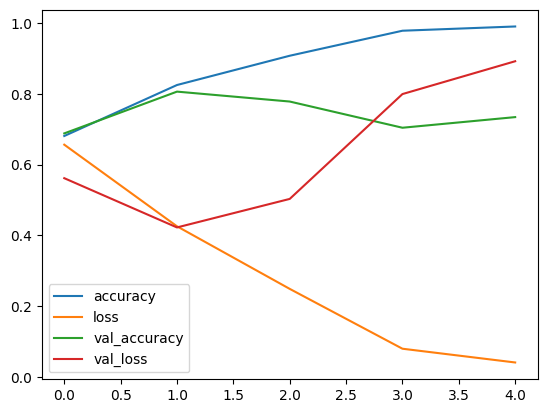

In [ ]:
# PLOT TRAINING CURVES
import pandas as pd
pd.DataFrame(history_3.history).plot()

In [ ]:
#plot validation and training curves separately
def plot_loss_curves(history):
  df=pd.DataFrame(history.history)

  acc = df["accuracy"]
  val_acc = df["val_accuracy"]
  loss = df["loss"]
  val_loss = df["val_loss"]
  epochs = range(len(history.history["loss"]))
  plt.figure(figsize = (10,10))
  #ACCURACY
  plt.subplot(2,2,1)
  plt.plot(epochs,acc,label = "training_accuracy")
  plt.plot(epochs,val_acc,label = "validation_accuracy")
  plt.title("Accuracy")
  plt.legend()
  # LOSS
  plt.subplot(2,2,2)
  plt.plot(epochs,loss,label = "training_loss")
  plt.plot(epochs,val_loss,label = "validation_loss")
  plt.title("Loss")
  plt.legend()
  plt.show()
  return None

**NOTE** When a model's **validation loss starts to increase**, its likely the model is **overfitting** the training dataset. This means, its learning the patterns in the training dataset too well and thus the model's ability to generalize to unseen data will be diminished.

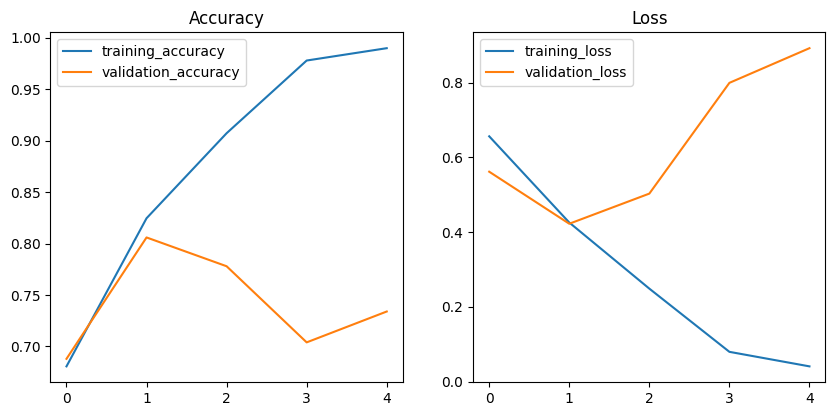

In [ ]:
plot_loss_curves(history=history_3)

### Adjust the model parameters
Fitting a machine learning model comes in 3 steps :
 0. Create a baseline model
 1. Beat the baseline model by overfitting the larger model
 2. Reduce the overfitting

Ways to induce overfitting :
* Increase no. of Conv2D layers
* Increase no. of Conv2D filters
* Add another dense layer to the output of our flattened layers

Reduce overfitting :
 * Add data augmentation
 * Add regularisation layers (such as MaxPool2D)
 * Add more data...

Reducing overfitting is called regularization

In [ ]:
# Create the model (this is our new baseline)

model_4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides = 1,
           padding = "valid",
           activation = "relu",
           input_shape =(224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3,activation ="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation ="sigmoid")
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Convlutional layer finds features from an image.

MaxPool layer finds important parts from features from conv layers.

In [ ]:
# Compile it
model_4.compile(loss =tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit it
history_4 = model_4.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - accuracy: 0.5864 - loss: 0.6775 - val_accuracy: 0.8060 - val_loss: 0.4689
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.7892 - loss: 0.4869 - val_accuracy: 0.8140 - val_loss: 0.4193
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.8062 - loss: 0.4259 - val_accuracy: 0.8120 - val_loss: 0.3778
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.8073 - loss: 0.4225 - val_accuracy: 0.8600 - val_loss: 0.3445
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.8506 - loss: 0.3564 - val_accuracy: 0.8800 - val_loss: 0.3296


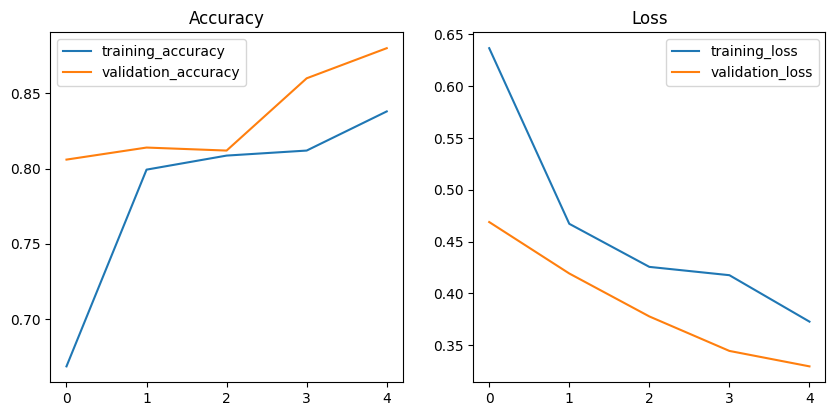

In [ ]:
plot_loss_curves(history_4)

In [ ]:
model_4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

## Opening bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1./255.,
                                             rotation_range = 0.2, # How much you want to rotate an image ?
                                             shear_range = 0.2, # How much you want to shear an image ?
                                             zoom_range = 0.2,# How much you want to zoom an image ?
                                             width_shift_range = 0.2, # How much you want to move an image in x-axis ?
                                             height_shift_range = 0.2, # How much you want to move an image in y-axis ?
                                             horizontal_flip = True # Do you want to flip the image

)

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale = 1./255.)

**Question** : What is data augmentation ?

Data augmentation is the process of altering our training data, leading it to have more diversity and in tuen allowing our models to learn more generatlizable ( hopefully) patterns. Altering might mean adjusting the rotation of an image,flipping it,cropping it or something similar.

In [ ]:
# Import Data and Augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   class_mode = "binary",
                                                                   batch_size = 32,
                                                                   shuffle = False) # For demonstration purposes only

print("Non Augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               batch_size = 32,
                                               shuffle = False)

print("Non augmented test data :")
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               batch_size = 32,
                                               shuffle = False)

Augmented training data
Found 1500 images belonging to 2 classes.
Non Augmented training data
Found 1500 images belonging to 2 classes.
Non augmented test data :
Found 500 images belonging to 2 classes.


**kEY NOTE** :-

Data augmentation is usually only performed on the training data. Using ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into model.

Let's Visualise some augmented data !!!.

In [ ]:
# Get sample data batches
images,labels = next(train_data)
augmented_images,augmented_labels = next(train_data_augmented)

Show image number : 18


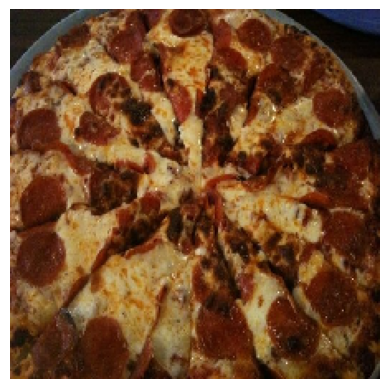

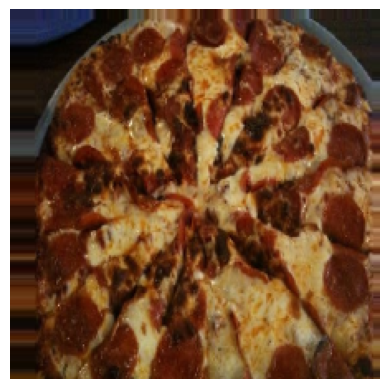

In [ ]:
import random
random_no = random.randint(0,32) # Our batch size is 32 ...
print(f"Show image number : {random_no}")
plt.imshow(images[random_no])
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_no])
plt.axis(False);

# Build the model by training it by data augmentation

In [ ]:
# Create a model (same as model_4)
model_5 = Sequential([
    Conv2D(10,3,activation = "relu",strides = 1,padding = "valid"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])

# Compile it

model_5.compile(
     loss = tf.keras.losses.BinaryCrossentropy(),
     optimizer = tf.keras.optimizers.Adam(),
     metrics = ["accuracy"]
 )

# Fit it

history_5 = model_5.fit(train_data_augmented,epochs =5,steps_per_epoch = len(train_data_augmented),validation_data = test_data,validation_steps = len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 419ms/step - accuracy: 0.5614 - loss: 0.7036 - val_accuracy: 0.5240 - val_loss: 0.6935
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 422ms/step - accuracy: 0.6067 - loss: 0.6713 - val_accuracy: 0.5880 - val_loss: 0.6521
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 400ms/step - accuracy: 0.6737 - loss: 0.6470 - val_accuracy: 0.6060 - val_loss: 0.6480
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 420ms/step - accuracy: 0.4638 - loss: 0.6990 - val_accuracy: 0.7020 - val_loss: 0.6003
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 429ms/step - accuracy: 0.5697 - loss: 0.6561 - val_accuracy: 0.8060 - val_loss: 0.5453


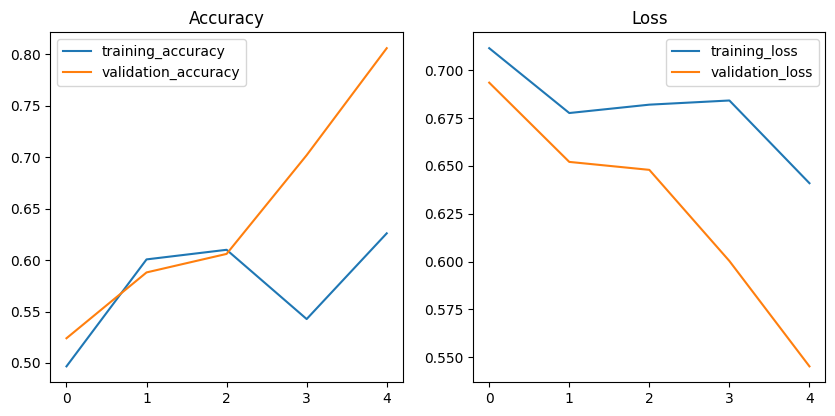

In [ ]:
plot_loss_curves(history_5)

In [ ]:
# Now shuffle the data
train_data_aug_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size = (224,224),
                                                                      batch_size = 32,
                                                                      shuffle = True, # Shuffle data this time
                                                                      class_mode = "binary")

Found 1500 images belonging to 2 classes.


In [ ]:
 # Create the model (same as model_4 and model_5)
model_6 = Sequential([
     Conv2D(10,3,strides = 1,padding = "valid",activation = 'relu',input_shape = (224,224,3)),
     MaxPool2D(),
     Conv2D(10,3,activation = "relu"),
     MaxPool2D(),
     Conv2D(10,3,activation = 'relu'),
     MaxPool2D(),
     Flatten(),
     Dense(1,activation = "sigmoid")
 ])

# Compile it

model_6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = Adam(),
    metrics = ["accuracy"]
)

#Fit it

history_6 = model_6.fit(train_data_aug_shuffled,
            epochs = 5,
            steps_per_epoch = len(train_data_aug_shuffled),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 442ms/step - accuracy: 0.5390 - loss: 0.6852 - val_accuracy: 0.7520 - val_loss: 0.5152
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 418ms/step - accuracy: 0.7420 - loss: 0.5445 - val_accuracy: 0.8100 - val_loss: 0.4280
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 470ms/step - accuracy: 0.7772 - loss: 0.4682 - val_accuracy: 0.8300 - val_loss: 0.3975
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 399ms/step - accuracy: 0.7733 - loss: 0.4756 - val_accuracy: 0.8480 - val_loss: 0.3620
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 424ms/step - accuracy: 0.7809 - loss: 0.4870 - val_accuracy: 0.8100 - val_loss: 0.4126


### WHY SHUFFLING ?
when shuffling data, the model gets exposed to all different kinds of data during training,thus enabling it to learn features across a wide range of arrays of images (in our case,pizza and steak at the same time instead of just pizza then steak)

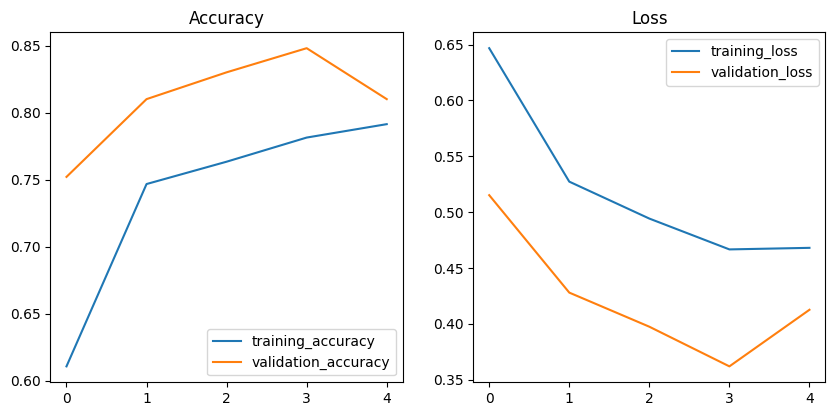

In [ ]:
# Plot loss curves
plot_loss_curves(history_6)

# REPEAT UNTIL SATISFIED (Experiment .....)
Since we've already beaten our baseline, there are a few things we could try to contine to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case.


In [ ]:
 # Create the model
model_6 = Sequential([
     Conv2D(32,3,strides = 1,padding = "valid",activation = 'relu',input_shape = (224,224,3)),
     MaxPool2D(),
     Conv2D(32,3,activation = "relu"),
     MaxPool2D(),
     Conv2D(10,3,activation = 'relu'),
     MaxPool2D(),
     Flatten(),
     Dense(1,activation = "sigmoid")
 ])

# Compile it

model_6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = Adam(),
    metrics = ["accuracy"]
)

#Fit it

history_6 = model_6.fit(train_data_aug_shuffled,
            epochs = 5,
            steps_per_epoch = len(train_data_aug_shuffled),
            validation_data = test_data,
            validation_steps = len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 729ms/step - accuracy: 0.5722 - loss: 0.6855 - val_accuracy: 0.6900 - val_loss: 0.5541
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 31s 668ms/step - accuracy: 0.7404 - loss: 0.5387 - val_accuracy: 0.8460 - val_loss: 0.3848
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 30s 439ms/step - accuracy: 0.7785 - loss: 0.4776 - val_accuracy: 0.8300 - val_loss: 0.4308
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 420ms/step - accuracy: 0.7534 - loss: 0.5196 - val_accuracy: 0.8400 - val_loss: 0.3712
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 510ms/step - accuracy: 0.7781 - loss: 0.4773 - val_accuracy: 0.8640 - val_loss: 0.3402


In [ ]:
model_6.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.8504 - loss: 0.3325


[0.34987056255340576, 0.843999981880188]

In [ ]:
 # Create the model
model_6 = Sequential([
     Conv2D(10,3,strides = 1,padding = "valid",activation = 'relu',input_shape = (224,224,3)),
     MaxPool2D(),
     Conv2D(10,3,activation = "relu"),
     MaxPool2D(),
     Conv2D(10,3,activation = 'relu'),
     MaxPool2D(),
     Conv2D(10,3,activation = "relu"),
     MaxPool2D(),
     Conv2D(10,3,activation = 'relu'),
     MaxPool2D(),
     Flatten(),
     Dense(1,activation = "sigmoid")
 ])

# Compile it

model_6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = Adam(),
    metrics = ["accuracy"]
)

#Fit it

history_6 = model_6.fit(train_data_aug_shuffled,
            epochs = 5,
            steps_per_epoch = len(train_data_aug_shuffled),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 485ms/step - accuracy: 0.5055 - loss: 0.6899 - val_accuracy: 0.5900 - val_loss: 0.6515
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 419ms/step - accuracy: 0.6206 - loss: 0.6581 - val_accuracy: 0.7980 - val_loss: 0.4818
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 546ms/step - accuracy: 0.7468 - loss: 0.5537 - val_accuracy: 0.8140 - val_loss: 0.4298
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 465ms/step - accuracy: 0.7219 - loss: 0.5543 - val_accuracy: 0.8280 - val_loss: 0.4261
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 434ms/step - accuracy: 0.7466 - loss: 0.5160 - val_accuracy: 0.8440 - val_loss: 0.3888


In [ ]:
model_6.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.8321 - loss: 0.4150


[0.38882896304130554, 0.843999981880188]

In [ ]:
 # Create the model (same as model_4 and model_5)
model_6 = Sequential([
     Conv2D(10,3,strides = 1,padding = "valid",activation = 'relu',input_shape = (224,224,3)),
     MaxPool2D(),
     Conv2D(10,3,activation = "relu"),
     MaxPool2D(),
     Conv2D(10,3,activation = 'relu'),
     MaxPool2D(),
     Flatten(),
     Dense(1,activation = "sigmoid")
 ])

# Compile it

model_6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = Adam(),
    metrics = ["accuracy"]
)

#Fit it

history_6 = model_6.fit(train_data_aug_shuffled,
            epochs = 10,
            steps_per_epoch = len(train_data_aug_shuffled),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 455ms/step - accuracy: 0.5393 - loss: 0.6846 - val_accuracy: 0.7900 - val_loss: 0.4967
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 431ms/step - accuracy: 0.6981 - loss: 0.5805 - val_accuracy: 0.7580 - val_loss: 0.4756
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 458ms/step - accuracy: 0.7439 - loss: 0.5410 - val_accuracy: 0.8240 - val_loss: 0.3899
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 44s 502ms/step - accuracy: 0.7764 - loss: 0.4710 - val_accuracy: 0.7980 - val_loss: 0.4307
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 450ms/step - accuracy: 0.7577 - loss: 0.5032 - val_accuracy: 0.8400 - val_loss: 0.3514
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 44s 509ms/step - accuracy: 0.8105 - loss: 0.4497 - val_accuracy: 0.8760 - val_loss: 0.3232
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 419ms/step - accuracy: 0.7935 - loss: 0.4561 - val_accuracy: 0.8680 - val_loss: 0.3103
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 438ms/step - accuracy: 0.7986 - loss: 0.4411 - val_accu

In [ ]:
model_6.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.8503 - loss: 0.3415


[0.289130300283432, 0.8759999871253967]

In [ ]:
 # Create the model (same as model_4 and model_5)
model_6 = Sequential([
     Conv2D(10,3,strides = 1,padding = "valid",activation = 'relu',input_shape = (224,224,3)),
     Conv2D(10,3,activation = "relu"),
     MaxPool2D(),
     Conv2D(10,3,activation = 'relu'),
     Conv2D(10,3,activation = "relu"),
     MaxPool2D(),
     Conv2D(10,3,activation = 'relu'),
     Conv2D(10,3,activation = "relu"),
     MaxPool2D(),
     Flatten(),
     Dense(1,activation = "sigmoid")
 ])

# Compile it

model_6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = Adam(),
    metrics = ["accuracy"]
)

#Fit it

history_6 = model_6.fit(train_data_aug_shuffled,
            epochs = 5,
            steps_per_epoch = len(train_data_aug_shuffled),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 487ms/step - accuracy: 0.5172 - loss: 0.6940 - val_accuracy: 0.6140 - val_loss: 0.6668
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 424ms/step - accuracy: 0.6348 - loss: 0.6372 - val_accuracy: 0.8300 - val_loss: 0.4116
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 445ms/step - accuracy: 0.7414 - loss: 0.5191 - val_accuracy: 0.8560 - val_loss: 0.3781
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 453ms/step - accuracy: 0.7497 - loss: 0.5061 - val_accuracy: 0.8560 - val_loss: 0.3560
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 440ms/step - accuracy: 0.7536 - loss: 0.5042 - val_accuracy: 0.8500 - val_loss: 0.3633


In [ ]:
model_6.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.8290 - loss: 0.3997


[0.3632538616657257, 0.8500000238418579]

In [ ]:
 # Create the model (same as model_4 and model_5)
model_6 = Sequential([
     Conv2D(10,3,strides = 1,padding = "valid",activation = 'relu',input_shape = (224,224,3)),
     Conv2D(10,3,activation = "relu"),
     MaxPool2D(),
     Conv2D(10,3,activation = 'relu'),
     Conv2D(10,3,activation = "relu"),
     MaxPool2D(),
     Conv2D(10,3,activation = 'relu'),
     Conv2D(10,3,activation = "relu"),
     MaxPool2D(),
     Flatten(),
     Dense(1,activation = "sigmoid")
 ])

# Compile it

model_6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = Adam(),
    metrics = ["accuracy"]
)

#Fit it

history_6 = model_6.fit(train_data_aug_shuffled,
            epochs = 10,
            steps_per_epoch = len(train_data_aug_shuffled),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 475ms/step - accuracy: 0.5285 - loss: 0.6872 - val_accuracy: 0.7400 - val_loss: 0.5638
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 424ms/step - accuracy: 0.6779 - loss: 0.5910 - val_accuracy: 0.8240 - val_loss: 0.3950
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 453ms/step - accuracy: 0.7294 - loss: 0.5211 - val_accuracy: 0.8400 - val_loss: 0.3681
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 423ms/step - accuracy: 0.7683 - loss: 0.4857 - val_accuracy: 0.8560 - val_loss: 0.3624
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 449ms/step - accuracy: 0.7699 - loss: 0.4823 - val_accuracy: 0.7560 - val_loss: 0.4756
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 441ms/step - accuracy: 0.7813 - loss: 0.4856 - val_accuracy: 0.8160 - val_loss: 0.3920
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 416ms/step - accuracy: 0.7997 - loss: 0.4443 - val_accuracy: 0.8600 - val_loss: 0.3295
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 426ms/step - accuracy: 0.7983 - loss: 0.4346 - val_accu

In [ ]:
model_6 = Sequential([
     Conv2D(10,3,strides = 1,padding = "valid",activation = 'relu',input_shape = (224,224,3)),
     Conv2D(10,3,activation = "relu"),
     MaxPool2D(kernel_size = 2,strides = 2),
     Conv2D(10,3,activation = 'relu'),
     Conv2D(10,3,activation = "relu"),
     MaxPool2D(kernel_size = 2,strides = 2),
     Dense(1,activation = "sigmoid")
 ])

# Compile it

model_6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = Adam(),
    metrics = ["accuracy"]
)

#Fit it

history_6 = model_6.fit(train_data_aug_shuffled,
            epochs = 10,
            steps_per_epoch = len(train_data_aug_shuffled),
            validation_data = test_data,
            validation_steps = len(test_data))

# Making a prediction with our trained model on our own custom data

--2025-04-12 00:57:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.3’

03-pizza-dad.jpeg.3 100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2025-04-12 00:57:35 (52.5 MB/s) - ‘03-pizza-dad.jpeg.3’ saved [2874848/2874848]



(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

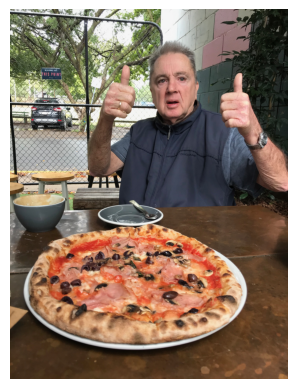

In [ ]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg
pizza = mpimg.imread("03-pizza-dad.jpeg")
plt.imshow(pizza)
plt.axis(False)

--2025-04-12 00:57:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.05s   

2025-04-12 00:57:55 (39.0 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

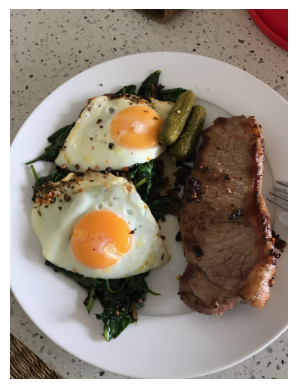

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [ ]:
# Check shape of our images
steak.shape,pizza.shape

((4032, 3024, 3), (4032, 3024, 3))

In [ ]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

#### **🔑 Note** : When you train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [ ]:
#Create a function to import a image and resize it to be able to be used with our model
def load_and_prep(filename,img_shape=224):
  """
  Reads an image from filename and reshapes it into a tensor of desired size(here 224)
  (img_shape,img_shape,color_channels)
  """
  # READ IN THE IMAGE
  img = tf.io.read_file(filename)
  # DECODE THE READ FILE INTO A TENSOR
  img = tf.image.decode_image(img)
  # RESIZE THE IMAGE
  img  = tf.image.resize(img,size = [img_shape,img_shape])
  # RESCALE THE IMAGE AND GET ALL VALUES BETWEEN 0 AND 1
  img = img/255.0
  return img

In [ ]:
pizza = load_and_prep("/content/03-pizza-dad.jpeg")
steak = load_and_prep("/content/03-steak.jpeg")

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

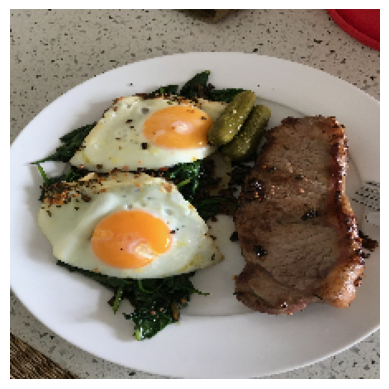

In [ ]:
plt.imshow(steak)
plt.axis(False)

In [ ]:
pred = model_6.predict(tf.expand_dims(steak,axis = 0))[0]
if(pred)> 0.5:
  print("Steak")
else:
  print("Pizza")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
Steak


In [ ]:
if(model_6.predict(tf.expand_dims(pizza,axis = 0)) > 0.5 ):
  print("Steak")
else:
  print("Pizza")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Pizza


### MY WAY

In [ ]:
def show_output(model,img,img_class):
  plt.title(f"Original : {img_class} ")
  plt.imshow(img)
  if(model.predict(tf.expand_dims(img,axis = 0))[0] > 0.5 ):
    plt.xlabel("Predicted : Steak")
  else:
    plt.xlabel("Predicted : Pizza")
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


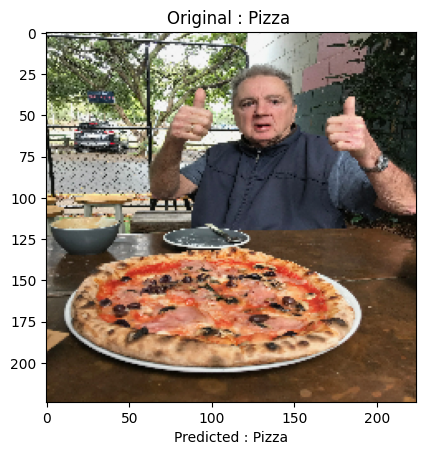

In [ ]:
show_output(model_6,pizza,"Pizza")

### SIR's WAY

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
class_names[int(tf.round(pred))]

np.str_('steak')

In [ ]:
def pred_and_plot(model,filename,class_names = class_names):
  """
  IMPORTS IMAGE AND MAKES A PREDICTION ON IMAGE
  AND PLOTS IT WITH PREDICTED CLASS NAME
  """
  # IMPORT TARGET IMAGE AND PREPROCESS IT
  img = load_and_prep(filename)
  # MAKE A PREDICTION
  pred = model.predict(tf.expand_dims(img,axis = 0))[0]
  # GET PREDICTED CLASS
  pred_class = class_names[int(tf.round(pred))]
  # PLOT THE IMAGE AND PREDICTED CLASS

  plt.imshow(img)
  plt.title(f"Predicted : {pred_class} ")
  plt.axis(False)
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


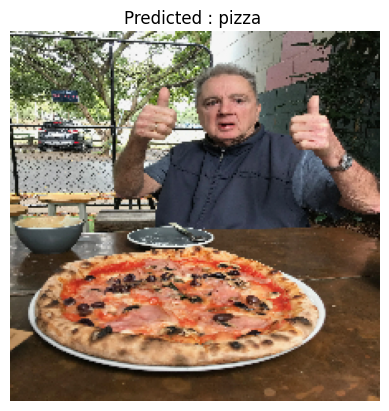

In [ ]:
pred_and_plot(model_6,"/content/03-pizza-dad.jpeg.1")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


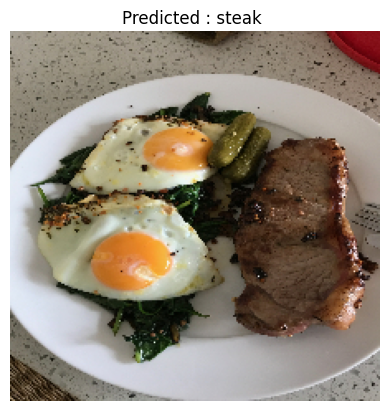

In [ ]:
pred_and_plot(model_6,"/content/03-steak.jpeg")

In [ ]:
!wget https://imgs.search.brave.com/HukllSVC9INy1IaVz-FvwYfSab4aCgAtOb0eV8SYtP8/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9kMXc3/MzEyd2VzZWU2OC5j/bG91ZGZyb250Lm5l/dC94RllhaE82aW9N/UFpvdmpBVzV0VVlF/bVdOd2VMemc4QnRG/cXVXZmVSWGNjL2V4/dDp3ZWJwL3F1YWxp/dHk6NTAvcGxhaW4v/czM6Ly90b2FzdC1z/aXRlcy1yZXNvdXJj/ZXMtcHJvZC9yZXN0/YXVyYW50SW1hZ2Vz/L2JiMzJhY2JlLTc5/NzMtNGYzMi05NWZk/LTUwZDUzNDgzNGMw/ZC9waXp6YXNob3Qu/anBn

--2025-04-12 01:48:40--  https://imgs.search.brave.com/HukllSVC9INy1IaVz-FvwYfSab4aCgAtOb0eV8SYtP8/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9kMXc3/MzEyd2VzZWU2OC5j/bG91ZGZyb250Lm5l/dC94RllhaE82aW9N/UFpvdmpBVzV0VVlF/bVdOd2VMemc4QnRG/cXVXZmVSWGNjL2V4/dDp3ZWJwL3F1YWxp/dHk6NTAvcGxhaW4v/czM6Ly90b2FzdC1z/aXRlcy1yZXNvdXJj/ZXMtcHJvZC9yZXN0/YXVyYW50SW1hZ2Vz/L2JiMzJhY2JlLTc5/NzMtNGYzMi05NWZk/LTUwZDUzNDgzNGMw/ZC9waXp6YXNob3Qu/anBn
Resolving imgs.search.brave.com (imgs.search.brave.com)... 18.164.174.43, 18.164.174.127, 18.164.174.92, ...
Connecting to imgs.search.brave.com (imgs.search.brave.com)|18.164.174.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 201892 (197K) [image/jpeg]
Saving to: ‘anBn’

anBn                100%[===================>] 197.16K  --.-KB/s    in 0.03s   

2025-04-12 01:48:40 (6.43 MB/s) - ‘anBn’ saved [201892/201892]



In [ ]:
!wget https://imgs.search.brave.com/Bvk0uNGTXHtqQAV9J22T6HNfGXilZQudulXDRQPn2hQ/rs:fit:500:0:0:0/g:ce/aHR0cHM6Ly9jaW5x/dWVjZW50b3Bpenpl/cmlhLmNvbS93cC1j/b250ZW50L3VwbG9h/ZHMvMjAyMy8wOC9w/aXp6YS1pbWFnZXMu/anBn

--2025-04-12 01:50:19--  https://imgs.search.brave.com/Bvk0uNGTXHtqQAV9J22T6HNfGXilZQudulXDRQPn2hQ/rs:fit:500:0:0:0/g:ce/aHR0cHM6Ly9jaW5x/dWVjZW50b3Bpenpl/cmlhLmNvbS93cC1j/b250ZW50L3VwbG9h/ZHMvMjAyMy8wOC9w/aXp6YS1pbWFnZXMu/anBn
Resolving imgs.search.brave.com (imgs.search.brave.com)... 18.164.174.127, 18.164.174.43, 18.164.174.38, ...
Connecting to imgs.search.brave.com (imgs.search.brave.com)|18.164.174.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75716 (74K) [image/jpeg]
Saving to: ‘anBn.1’

anBn.1              100%[===================>]  73.94K  --.-KB/s    in 0.02s   

2025-04-12 01:50:19 (3.04 MB/s) - ‘anBn.1’ saved [75716/75716]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


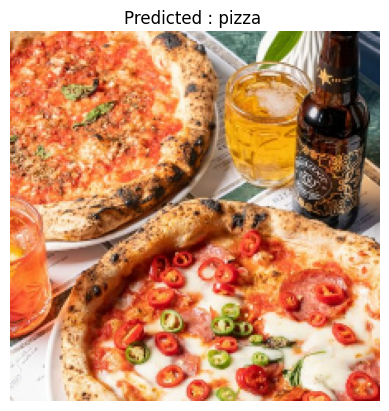

In [ ]:
pred_and_plot(model_6,"/content/anBn.1")

# -----------------------------------------------------THANK YOU ---------------------------------------------------------